In [17]:
# Step 1: Upload your kaggle.json
from google.colab import files
uploaded = files.upload()

import os, zipfile

os.makedirs("/root/.kaggle", exist_ok=True)
for fn in uploaded.keys():
    os.rename(fn, "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)

# Step 2: Download the competition data
!kaggle competitions download -c playground-series-s5e10

# Step 3: Download the dataset “Simulated Roads Accident Data”
!kaggle datasets download -d ianktoo/simulated-roads-accident-data

# Step 4: Unzip them
# Unzip competition
with zipfile.ZipFile("playground-series-s5e10.zip", "r") as z:
    z.extractall("playground-series-s5e10")

# Unzip the simulated roads accident dataset (it will produce those CSVs)
with zipfile.ZipFile("simulated-roads-accident-data.zip", "r") as z:
    z.extractall("simulated-roads-accident-data")

print("✅ Downloaded and extracted competition + simulated roads accident data.")

Saving kaggle.json to kaggle.json
playground-series-s5e10.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/ianktoo/simulated-roads-accident-data
License(s): CC0-1.0
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 626MB/s]
✅ Downloaded and extracted competition + simulated roads accident data.


In [18]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('/content/playground-series-s5e10/train.csv')

In [105]:
test_df = pd.read_csv('/content/playground-series-s5e10/test.csv')

In [20]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [22]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

road_type ['urban' 'rural' 'highway']
lighting ['daylight' 'dim' 'night']
weather ['rainy' 'clear' 'foggy']
time_of_day ['afternoon' 'evening' 'morning']


In [24]:
for col in test_df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

road_type ['urban' 'rural' 'highway']
lighting ['daylight' 'dim' 'night']
weather ['rainy' 'clear' 'foggy']
time_of_day ['afternoon' 'evening' 'morning']


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='num_lanes', ylabel='accident_risk'>

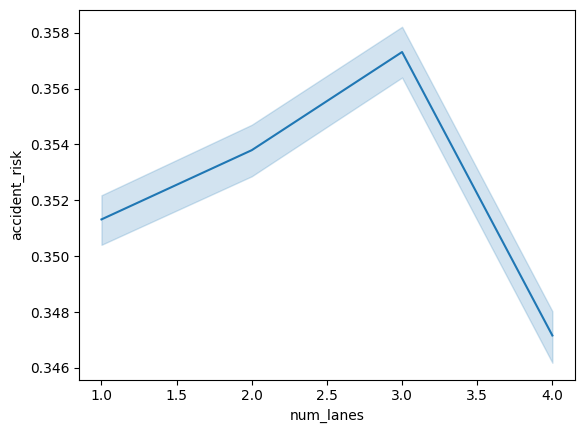

In [43]:
sns.lineplot(data=df, x='num_lanes', y='accident_risk')

<Axes: xlabel='num_reported_accidents', ylabel='accident_risk'>

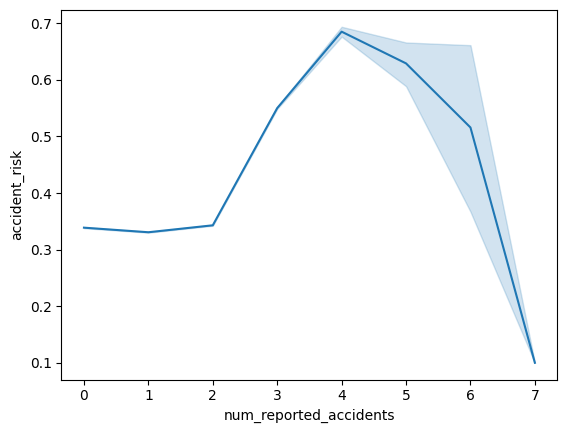

In [42]:
sns.lineplot(data=df, x='num_reported_accidents', y='accident_risk')

<Axes: xlabel='speed_limit', ylabel='accident_risk'>

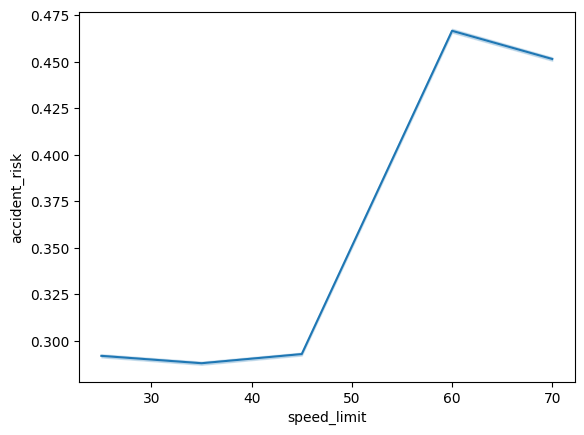

In [41]:
sns.lineplot(data=df, x='speed_limit', y='accident_risk')

In [29]:
sra = pd.read_csv('/content/simulated-roads-accident-data/synthetic_road_accidents_100k.csv')

In [32]:
sra.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,rural,2,0.29,70,night,rainy,False,True,evening,False,False,1,0.64
1,highway,1,0.34,25,dim,clear,False,False,morning,False,False,3,0.27
2,rural,2,0.76,70,night,foggy,True,False,evening,True,True,1,0.76
3,rural,3,0.37,70,night,foggy,True,False,morning,False,True,0,0.60
4,highway,3,0.39,45,dim,rainy,False,True,morning,False,False,0,0.17


In [37]:
sra.columns == df.drop('id', axis=1).columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
sra.info()

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [69]:
df1 = df.drop(['id', 'accident_risk'], axis=1)
df1.columns

Index(['road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents'],
      dtype='object')

In [70]:
cat_cols = [c for c in df1.columns if df1[c].dtype == 'object']
cat_cols

['road_type', 'lighting', 'weather', 'time_of_day']

In [71]:
cat_cols

['road_type', 'lighting', 'weather', 'time_of_day']

In [72]:
myPipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [73]:
myPipeline.fit_transform(df1[cat_cols])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1368516 stored elements and shape (517754, 8)>

In [74]:
myPipeline.get_feature_names_out()

array(['road_type_rural', 'road_type_urban', 'lighting_dim',
       'lighting_night', 'weather_foggy', 'weather_rainy',
       'time_of_day_evening', 'time_of_day_morning'], dtype=object)

In [75]:
cat_df = pd.DataFrame(myPipeline.fit_transform(df1[cat_cols]).toarray(), columns=myPipeline.get_feature_names_out(), dtype='int8')

In [76]:
cat_df.head()

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0
2,1,0,1,0,0,0,0,1
3,0,0,1,0,0,1,0,1
4,1,0,0,0,1,0,1,0


In [77]:
final_df = pd.concat([df1.drop(cat_cols, axis=1), cat_df], axis=1)

In [78]:
final_df.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,2,0.06,35,False,True,False,True,1,0,1,0,0,0,1,0,0
1,4,0.99,35,True,False,True,True,0,0,1,0,0,0,0,1,0
2,4,0.63,70,False,True,True,False,2,1,0,1,0,0,0,0,1
3,4,0.07,35,True,True,False,False,1,0,0,1,0,0,1,0,1
4,1,0.58,60,False,False,True,False,1,1,0,0,0,1,0,1,0


In [79]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               517754 non-null  int64  
 1   curvature               517754 non-null  float64
 2   speed_limit             517754 non-null  int64  
 3   road_signs_present      517754 non-null  bool   
 4   public_road             517754 non-null  bool   
 5   holiday                 517754 non-null  bool   
 6   school_season           517754 non-null  bool   
 7   num_reported_accidents  517754 non-null  int64  
 8   road_type_rural         517754 non-null  int8   
 9   road_type_urban         517754 non-null  int8   
 10  lighting_dim            517754 non-null  int8   
 11  lighting_night          517754 non-null  int8   
 12  weather_foggy           517754 non-null  int8   
 13  weather_rainy           517754 non-null  int8   
 14  time_of_day_evening 

In [85]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [81]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

In [83]:
X_train, X_test, y_train, y_test = train_test_split(final_df, df['accident_risk'], test_size=0.2, random_state=42)

In [92]:
for name, model in models.items():
    print(f"📊 Model: {name}")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred_test)
    rmse1 = root_mean_squared_error(y_train, y_pred_train)

    print(f"Testing  RMSE     : {rmse:.4f}")
    print(f"Training  RMSE     : {rmse1:.4f}")
    print(f"Score     : {model.score(X_test, y_test):.4f}")

    print("="*50)
    print()

📊 Model: LinearRegression
Testing  RMSE     : 0.0735
Training  RMSE     : 0.0735
Score     : 0.8042

📊 Model: Ridge
Testing  RMSE     : 0.0735
Training  RMSE     : 0.0735
Score     : 0.8042

📊 Model: Lasso
Testing  RMSE     : 0.1627
Training  RMSE     : 0.1630
Score     : 0.0412



In [93]:
import xgboost

In [95]:
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
rmse1 = root_mean_squared_error(y_train, y_pred_train)
print(f"Testing  RMSE     : {rmse:.4f}")
print(f"Training  RMSE     : {rmse1:.4f}")
print(f"Score     : {xgb_model.score(X_test, y_test):.4f}")
print(f"Score     : {xgb_model.score(X_train, y_train):.4f}")

Testing  RMSE     : 0.0563
Training  RMSE     : 0.0554
Score     : 0.8850
Score     : 0.8893


In [106]:
test_df_id_col = test_df['id']

In [107]:
test_df = test_df.drop('id', axis=1)

In [108]:
test_df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [109]:
test_cat_df = pd.DataFrame(myPipeline.transform(test_df[cat_cols]).toarray(), columns=myPipeline.get_feature_names_out(), dtype='int8')

In [110]:
test_cat_df.head()

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0,0,0,1,0,0,0,0
1,0,1,1,0,1,0,0,0
2,0,1,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0


In [111]:
test_final_df = pd.concat([test_df.drop(cat_cols, axis=1), test_cat_df], axis=1)

In [112]:
xgb_model.predict(test_final_df)

array([0.2911898 , 0.12112489, 0.19138192, ..., 0.24899909, 0.12878196,
       0.48506704], dtype=float32)

In [113]:
submission_df = pd.DataFrame({
    'id': test_df_id_col,
    'accident_risk': xgb_model.predict(test_final_df)
})

In [114]:
submission_df.to_csv('submission.csv', index=False)